<a href="https://colab.research.google.com/github/Karuni001/Finance-Management-Application/blob/main/rice_disease_sih.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
!kaggle competitions download -c paddy-disease-classification

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
#import train.csv file
data = pd.read_csv("/content/sample_data/rice_dataset/train.csv") # Changed the path to "rice_dataset/train.csv". Make sure this is the correct path to your file.
data.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [ ]:
data.shape

(10407, 4)

In [ ]:
data['label'].unique().tolist()

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [ ]:
data['variety'].unique().tolist()

['ADT45',
 'IR20',
 'KarnatakaPonni',
 'Onthanel',
 'Ponni',
 'Surya',
 'Zonal',
 'AndraPonni',
 'AtchayaPonni',
 'RR']

In [ ]:
data['age'].describe()

,age
count,10407.000000
mean,64.043624
std,8.958830
min,45.000000
25%,60.000000
50%,67.000000
75%,70.000000
max,82.000000


#observations

#1. we have 10407, images un train data .
#we have 10 unique disease classes.
#3. we also have 10 variesites of rice in this data .
#4. we have rise plants age ranging from 45-85
#5. ADT45 is the most common variety inside the training data


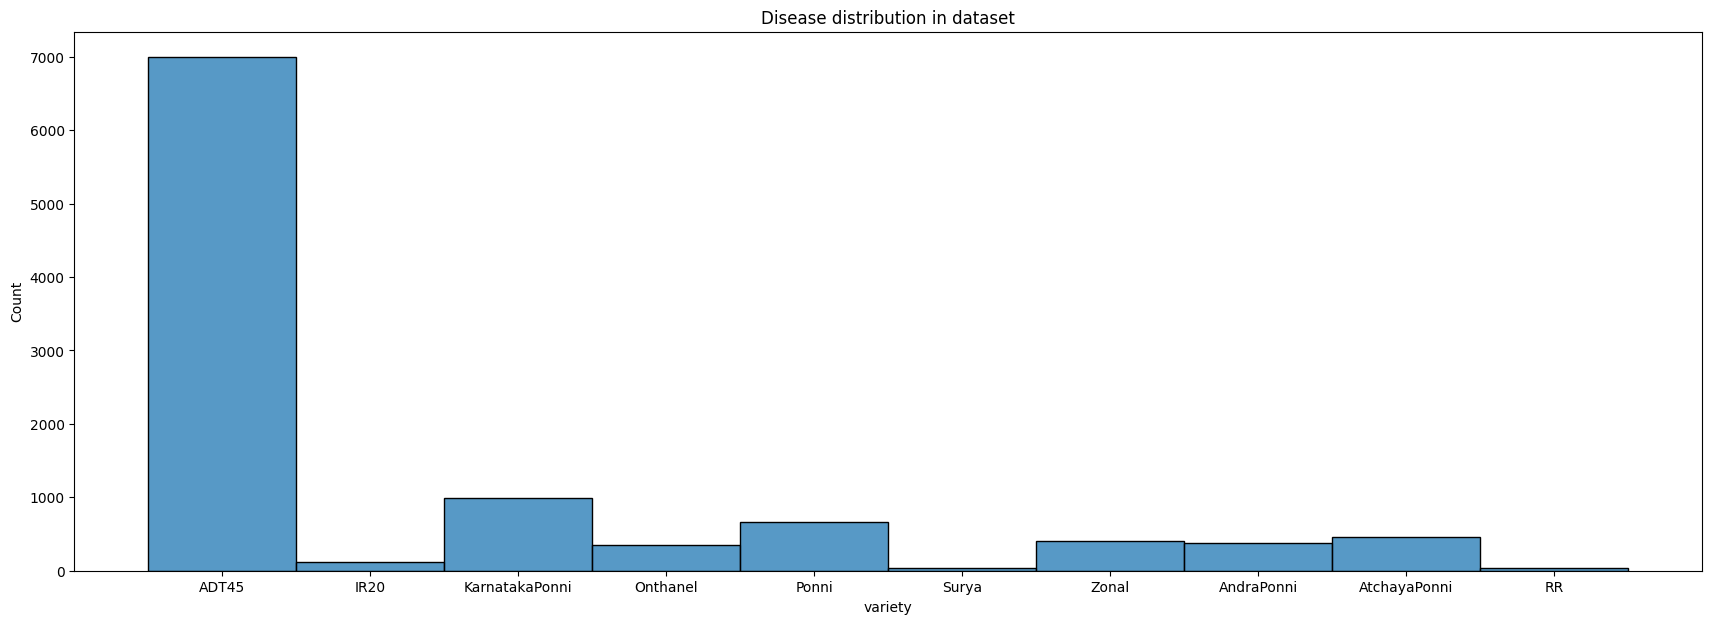

In [ ]:
#plot the data count based on variety name
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,1,figsize = (21,7)) # create the fig variable using plt.subplots
sns.histplot(data, x='variety', ax = axes)
plt.title('Disease distribution in dataset')
plt.show()

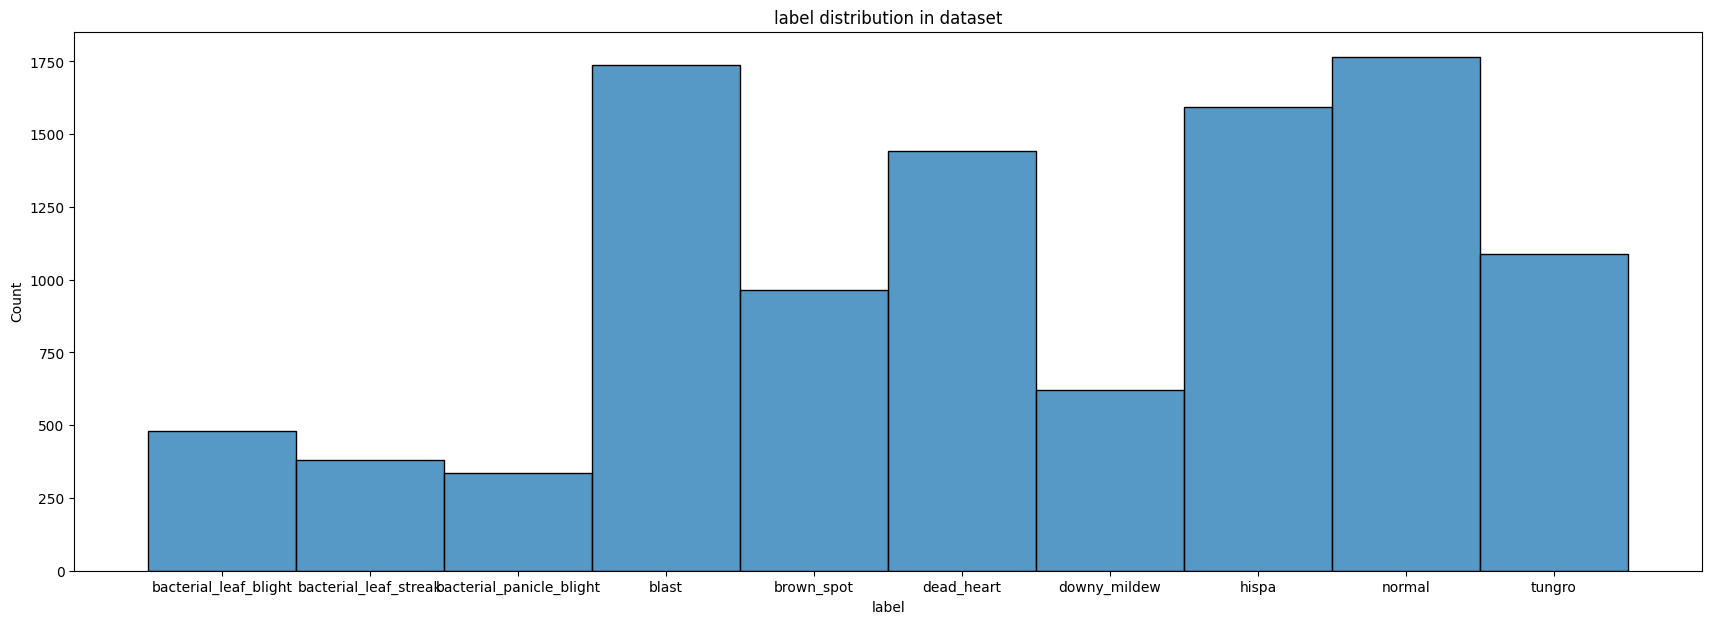

In [ ]:
#plot the data count based on variety name
fig, axes = plt.subplots(1,1,figsize = (21,7)) #assigns the Figure object to fig and Axes object to axes
sns.histplot(data, x='label', ax = axes) #plots the data on the axes
plt.title('label distribution in dataset')
plt.show()

In [ ]:
normal = data[data['label'] == 'normal']
normal = normal[normal['variety'] == 'ADT45']
five_normals = normal.image_id[:5].values
five_normals.tolist()

['100007.jpg', '100025.jpg', '100135.jpg', '100165.jpg', '100171.jpg']

In [ ]:
dead = data[data['label'] == 'dead_heart']
dead = dead[dead['variety'] == 'ADT45']
five_deads = dead.image_id[:5].values
five_deads.tolist()

['101165.jpg', '102750.jpg', '108367.jpg', '109900.jpg', '100222.jpg']

FileNotFoundError: [Errno 2] No such file or directory: '/content/rice_dataset/train_image/normal/100007.jpg'

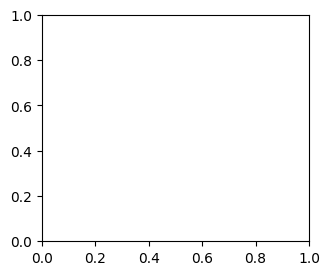

In [ ]:
#make plot of images just to have an idea
plt.figure(figsize = (20,10))
columns = 5
path = '/content/rice_dataset/train_image' #The original path was missing a '/'
for i ,image_loc in enumerate(np.concatenate((five_normals, five_deads))):
  plt.subplot(10//columns + 1, columns, i+1)

  if i < 5 :
    image = plt.imread(path +"/normal/"+image_loc) #Added a '/' to the path
    plt.title("normal")
  else:
    plt.title("dead heart disease")
    image = plt.imread(path + "/dead_heart/"+ image_loc) #Added a '/' to the path

    plt.imshow(image)

In [ ]:
images = ['./content/rice_dataset/train_image/hispa/100658.jpg',
          './content/rice_dataset/train_image/bacterial_leaf_blight/100159.jpg', #Fixed typo in file name
          './content/rice_dataset/train_image/downy_mildew/100159.jpg',
          './content/rice_dataset/train_image/blast/100159.jpg',
          './content/rice_dataset/train_image/bacterial_leaf_streak/100159.jpg', #Fixed typo in file name
          './content/rice_dataset/train_image/normal/100159.jpg',
          './content/rice_dataset/train_image/brown_spot/100159.jpg',
          './content/rice_dataset/train_image/dead_heart/100159.jpg',
          './content/rice_dataset/train_image/bacterial_panicle_blight/100159.jpg']
diseases = ['hispa','bacterial_leaf_blight','downy_mildew','blast','bacterial_leaf_streak','normal','brown_spot','dead_heart','bacterial_panicle_blight']
diseases = [disease +'image' for disease in diseases]
plt.figure(figsize = (20,10))
columns = 5
for i, image_loc in enumerate(images):
  plt.subplot(len(images)//columns + 1, columns,i+1)
  image=plt.imread(image_loc)
  plt.title(diseases[i])
  plt.imshow(image)

In [ ]:
#encode both columns label and variet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
data['variety'] = label_encoder.fit_transform(data['variety'])

data.head()

In [ ]:
batch_size =16
img_height =224
img_width = 224

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/rice_dataset/train_image",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/rice_dataset/train_image",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

In [ ]:
class_names = train_ds.class_names
print(class_names)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
  for i in range(18):
    ax = plt.subplot(3, 6, i+1 )
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

In [ ]:
autotune = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=autotune)
val_ds = val_ds.cache().prefetch(buffer_size=autotune)

In [ ]:
num_classes = len(class_names)
num_classes

In [ ]:

model = tf.keras.Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(
  optimizer='adam',
  loss= tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
%%time
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=3)

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,
  callbacks=[early_stopping]
)
loss = model.evaluate(val_ds)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: name 'model' is not defined

In [ ]:
model.save('my_model.h5')

In [ ]:
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model('model.h5') # Replace with the actual path to your model.

In [ ]:
uploaded_file = st.file_uploader("Choose a file")

In [ ]:
if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")

In [ ]:
if uploaded_file is not None:
    # Preprocess the image
    img = image.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    class_names = ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal'] # Update with your class names

    st.write(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )